In [1]:
import http.client
import urllib.request
import urllib.parse
import urllib.error
import base64
import json
import os

from IPython.display import Image
import cv2  
import pandas as pd
import numpy as np

## Load tagged from custom vision

In [2]:
headers = {
 # Request headers
 'Training-Key': '1a4a4c41bd394819be757c43ac8f1931' #--------------------แก้ตาม Custom Project
}
project_id = "0d45dea2-4cd0-48b2-b3ec-a5b1e84e19a2" #--------------------แก้ตาม Custom Project

In [3]:
params = urllib.parse.urlencode({
 # Format - int32. Maximum number of images to return. Defaults to 50, limited to 256.
 'take': '50',
 # Format - int32. Number of images to skip before beginning the image batch. Defaults to 0.
 'skip': '0'
})

In [4]:
try:
     # base url
    conn = http.client.HTTPSConnection('southeastasia.api.cognitive.microsoft.com')
    conn.request("GET", f"/customvision/v3.0/training/projects/{project_id}/images/tagged?{params}", "{body}", headers)
    response = conn.getresponse() 
    # get response as a raw string
    data = response.read() 
    # convert the string to a json object
    data_json = json.loads(data)
except:
    print('error')

In [5]:
len(data_json)

50

## Dataframe for checking images

In [6]:
df = pd.read_csv('/media/tohn/HDD/VISION_dataset/mammo/mammo.csv')
df.head(5)

,Unnamed: 0,Case,FileName,Path,Split,Category
0,0,133,mammo_133.jpg,/media/tohn/HDD/VISION_dataset/mammo/test/mamm...,test,test
1,1,135,mammo_135.jpg,/media/tohn/HDD/VISION_dataset/mammo/test/mamm...,test,test
2,2,130,mammo_130.jpg,/media/tohn/HDD/VISION_dataset/mammo/test/mamm...,test,test
3,3,129,mammo_129.jpg,/media/tohn/HDD/VISION_dataset/mammo/test/mamm...,test,test
4,4,128,mammo_128.jpg,/media/tohn/HDD/VISION_dataset/mammo/test/mamm...,test,test


In [7]:
len(df)

134

In [8]:
thisdf=df

### Checking images loop 

#### รอบที่ 1 : 50

In [10]:
def findmat (thisdf):
    for record in thisdf.iterrows():
        img_path = record[1]['Path']
        img_c = cv2.imread(img_path)
        try:
            if (img_c.shape[0] == img.shape[0]) and (img_c.shape[1] == img.shape[1]):
                img_dif = np.sum(img-img_c)
                path = 'None'
                if img_dif == 0:
                    print(img_path)
                    path = img_path
                return path
        except:
            path = 'None'
            print('this is none')

In [11]:
datadf = list()
for i in range(0,len(data_json)):
    
    #load image origin save to test.jpg
    urllib.request.urlretrieve(data_json[i]['originalImageUri'],'test.jpg')
    img = cv2.imread('test.jpg') 
    
    originalImage = data_json[i]['originalImageUri']
    for j in range(len(data_json[i]['regions'])):    
        tagName = data_json[i]['regions'][j]['tagName']
        left = int(data_json[i]['regions'][j]['left'] * data_json[i]['width'])
        top = int(data_json[i]['regions'][j]['top'] * data_json[i]['height'])
        width = int(data_json[i]['regions'][j]['width'] * data_json[i]['width'])
        height = int(data_json[i]['regions'][j]['height'] * data_json[i]['height'])
    #     img = cv2.rectangle(img, (left,top), (left+width,top+height), (255,0,0), 5)
        #Real point
        Rleft =data_json[i]['regions'][j]['left']
        Rtop = data_json[i]['regions'][j]['top']
        Rwidth = data_json[i]['regions'][j]['width']
        Rheight = data_json[i]['regions'][j]['height']
    
        #loop check img
        print(i)
        path = findmat(thisdf)
        print(path)

        datadf.append({'img_path':path,'tagName':tagName,'originalImage': originalImage, 'left':left, 'top':top,
                              'width':width,'height':height, 'Rleft':Rleft, 'Rtop':Rtop,
                              'Rwidth':Rwidth,'Rheight':Rheight})

0
None
1
None
2
None
3
None
4
None
5
None
6
None
6
None
6
None
7
None
7
None
7
None
8
None
9
None
9
None
10
None
10
None
11
None
11
None
12
None
13
None
14
None
15
None
16
None
16
None
17
None
17
None
18
None
19
None
19
None
19
None
20
None
20
None
20
None
20
None
20
None
21
None
22
None
23
None
23
None
23
None
24
None
24
None
25
None
26
None
27
None
28
None
29
None
30
None
31
None
32
None
33
None
33
None
33
None
33
None
34
None
34
None
34
None
34
None
34
None
35
None
36
None
37
None
38
None
39
None
40
None
41
None
42
None
43
None
44
None
45
None
46
None
47
None
48
None
48
None
49
None


#### รอบที่ 2 : 100

In [12]:
headers = {
 # Request headers
 'Training-Key': '1a4a4c41bd394819be757c43ac8f1931' #--------------------แก้ตาม Custom Project
}
project_id = "0d45dea2-4cd0-48b2-b3ec-a5b1e84e19a2" #--------------------แก้ตาม Custom Project
params = urllib.parse.urlencode({
 # Format - int32. Maximum number of images to return. Defaults to 50, limited to 256.
 'take': '50',
 # Format - int32. Number of images to skip before beginning the image batch. Defaults to 0.
 'skip': '50'
})

try:
     # base url
    conn = http.client.HTTPSConnection('southeastasia.api.cognitive.microsoft.com')
    conn.request("GET", f"/customvision/v3.0/training/projects/{project_id}/images/tagged?{params}", "{body}", headers)
    response = conn.getresponse() 
    # get response as a raw string
    data = response.read() 
    # convert the string to a json object
    data_json = json.loads(data)
except:
    print('error')
    
len(data_json)

37

In [13]:
thisdf=df

In [14]:
def findmat (thisdf):
    for record in thisdf.iterrows():
        img_path = record[1]['Path']
        img_c = cv2.imread(img_path)
        try:
            if (img_c.shape[0] == img.shape[0]) and (img_c.shape[1] == img.shape[1]):
                img_dif = np.sum(img-img_c)
                path = 'None'
                if img_dif == 0:
                    print(img_path)
                    path = img_path
                return path
        except:
            path = 'None'
            print('this is none')

In [15]:
# datadf = list()
for i in range(0,len(data_json)):
    
    #load image origin save to test.jpg
    urllib.request.urlretrieve(data_json[i]['originalImageUri'],'test.jpg')
    img = cv2.imread('test.jpg') 
    
    originalImage = data_json[i]['originalImageUri']
    for j in range(len(data_json[i]['regions'])):    
        tagName = data_json[i]['regions'][j]['tagName']
        left = int(data_json[i]['regions'][j]['left'] * data_json[i]['width'])
        top = int(data_json[i]['regions'][j]['top'] * data_json[i]['height'])
        width = int(data_json[i]['regions'][j]['width'] * data_json[i]['width'])
        height = int(data_json[i]['regions'][j]['height'] * data_json[i]['height'])
    #     img = cv2.rectangle(img, (left,top), (left+width,top+height), (255,0,0), 5)
        #Real point
        Rleft =data_json[i]['regions'][j]['left']
        Rtop = data_json[i]['regions'][j]['top']
        Rwidth = data_json[i]['regions'][j]['width']
        Rheight = data_json[i]['regions'][j]['height']
    
        #loop check img
        print(i)
        path = findmat(thisdf)
        print(path)

        datadf.append({'img_path':path,'tagName':tagName,'originalImage': originalImage, 'left':left, 'top':top,
                              'width':width,'height':height, 'Rleft':Rleft, 'Rtop':Rtop,
                              'Rwidth':Rwidth,'Rheight':Rheight})

0
None
1
None
2
None
3
None
3
None
4
None
5
None
6
None
7
None
7
None
7
None
8
None
9
None
10
None
11
None
12
None
13
None
13
None
14
None
14
None
15
None
15
None
16
None
17
None
17
None
18
None
19
None
20
None
21
None
22
None
23
None
24
None
25
None
26
None
27
None
28
None
29
None
30
None
31
None
32
None
32
None
33
None
34
None
35
None
36
None
36
None
36
None
36
None


In [16]:
df = pd.DataFrame(datadf)
df.head()

,img_path,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight
0,None,mammo,https://irisprodseatraining.blob.core.windows....,144,346,31,26,0.203652,0.486986,0.044944,0.037921
1,None,mammo,https://irisprodseatraining.blob.core.windows....,150,279,25,25,0.212079,0.392885,0.035112,0.036517
2,None,mammo,https://irisprodseatraining.blob.core.windows....,100,444,34,31,0.141854,0.624627,0.049157,0.043539
3,None,mammo,https://irisprodseatraining.blob.core.windows....,75,297,25,28,0.106592,0.417580,0.036466,0.040673
4,None,mammo,https://irisprodseatraining.blob.core.windows....,226,295,31,34,0.317416,0.415357,0.043539,0.049157


In [17]:
print(len(df))

124


In [19]:
os.chdir('/home/yupaporn/USAI_labeling/')
df.to_csv('mammo_Internal_train1.csv')

## Merge df  

In [21]:
df1 = pd.read_csv('/home/yupaporn/USAI_labeling/mammo_Internal_train1.csv')
df2 = pd.read_csv('/home/yupaporn/USAI_labeling/mammo_External_train2.csv')
df3 = pd.read_csv('/home/yupaporn/USAI_labeling/mammo_Test.csv')

In [22]:
df = pd.concat([df1,df2,df3])
df

,Unnamed: 0,img_path,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight
0,0,None,mammo,https://irisprodseatraining.blob.core.windows....,144,346,31,26,0.203652,0.486986,0.044944,0.037921
1,1,None,mammo,https://irisprodseatraining.blob.core.windows....,150,279,25,25,0.212079,0.392885,0.035112,0.036517
2,2,None,mammo,https://irisprodseatraining.blob.core.windows....,100,444,34,31,0.141854,0.624627,0.049157,0.043539
3,3,None,mammo,https://irisprodseatraining.blob.core.windows....,75,297,25,28,0.106592,0.417580,0.036466,0.040673
4,4,None,mammo,https://irisprodseatraining.blob.core.windows....,226,295,31,34,0.317416,0.415357,0.043539,0.049157
...,...,...,...,...,...,...,...,...,...,...,...,...
23,23,None,mammo,https://irisprodseatraining.blob.core.windows....,460,375,31,34,0.646067,0.527717,0.044944,0.049157
24,24,None,mammo,https://irisprodseatraining.blob.core.windows....,21,526,35,26,0.030899,0.739795,0.050562,0.037921
25,25,None,mammo,https://irisprodseatraining.blob.core.windows....,108,427,37,31,0.153090,0.600750,0.053371,0.043539
26,26,None,mammo,https://irisprodseatraining.blob.core.windows....,148,430,34,26,0.209270,0.604964,0.047753,0.037921


In [23]:
os.chdir('/home/yupaporn/USAI_labeling/')
df.to_csv('mammo_taged.csv')

In [41]:
# urllib.request.urlretrieve(data_json[0]['originalImageUri'],'test.jpg')
# img = cv2.imread('test.jpg') 
# print(img.shape[0])
# print(img.shape[1])

712
712


In [49]:
# thisdf['Path'].tolist()[0]

'/media/tohn/HDD/VISION_dataset/mammo/test/mammo_133.jpg'

712
712


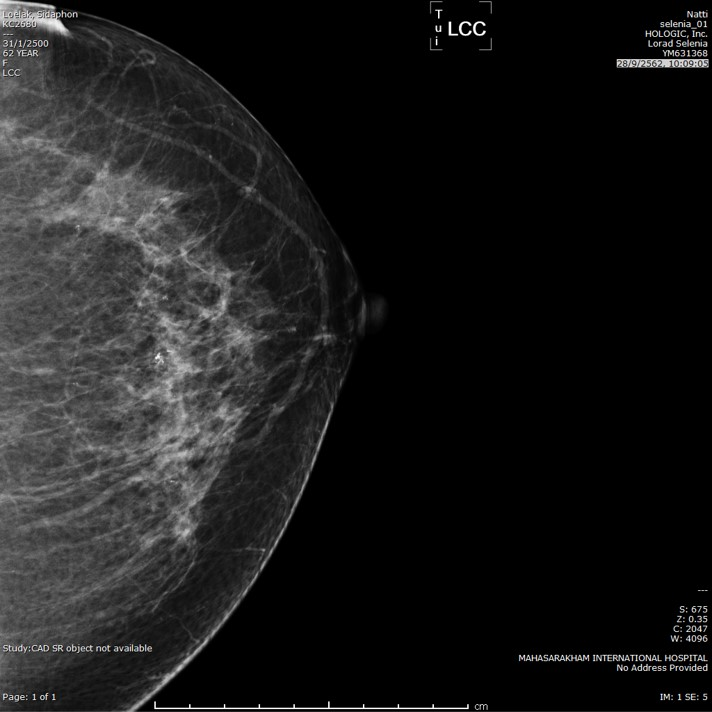

In [53]:
# #load image origin save to test.jpg
# from IPython.display import Image
# img_path = '/media/tohn/HDD/VISION_dataset/mammo/train/Internal/mammo_117.jpg'
# img_c = cv2.imread(img_path)
# print(img_c.shape[0])
# print(img_c.shape[1])
# Image(filename=img_path)

712
712


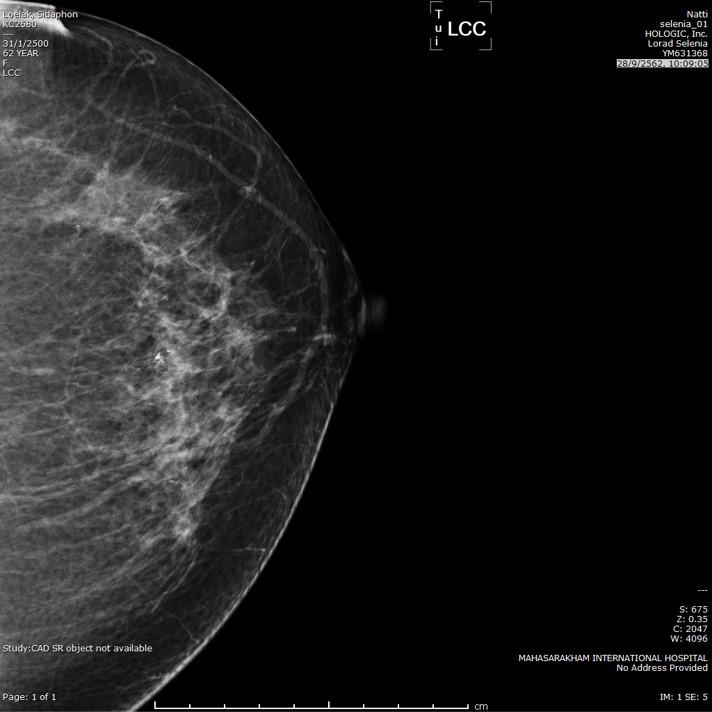

In [51]:
# #load image origin save to test.jpg
# urllib.request.urlretrieve(data_json[0]['originalImageUri'],'test.jpg')
# img = cv2.imread('test.jpg') 
# print(img.shape[0])
# print(img.shape[1])
# from IPython.display import Image
# Image(filename='test.jpg') 

In [62]:
# print(img.shape)
# print(img_c.shape)

(712, 712, 3)
(712, 712, 3)


In [54]:
# img_dif = np.sum(img-img_c)
# img_dif

69261032

In [44]:
# for record in thisdf.iterrows():
#     img_path = record[1]['Path']
#     img_c = cv2.imread(img_path)
#     print(img_c.shape[0])
#     print(img_c.shape[1])
#     print(img.shape[0])
#     print(img.shape[1])
#     if (img_c.shape[0] == img.shape[0]) and (img_c.shape[1] == img.shape[1]):
#         img_dif = np.sum(img-img_c)
#         print(img_dif)
#         path = 'None'
#         if img_dif == 0:
#             print(img_path)
#             path = img_path

712
712
712
712
217604185
712
712
712
712
105644016
712
713
712
712
712
712
712
712
234802639
712
712
712
712
109526257
712
712
712
712
97456275
712
712
712
712
215128903
712
712
712
712
54090259
713
712
712
712
712
712
712
712
116720241
712
712
712
712
69684527
712
712
712
712
99633984
712
712
712
712
79084091
712
712
712
712
54090259
712
713
712
712
712
712
712
712
125199914
712
712
712
712
105644016
712
712
712
712
97456275
712
713
712
712
712
712
712
712
105644016
712
712
712
712
55347382
712
712
712
712
115727217
712
712
712
712
56094871
712
712
712
712
181737378
712
712
712
712
184490647
712
712
712
712
100478368
712
712
712
712
193134184
712
712
712
712
71738806
712
712
712
712
82394017
712
712
712
712
62322159
712
712
712
712
81473370
712
712
712
712
104304620
713
713
712
712
712
712
712
712
60237345
712
712
712
712
66194608
712
712
712
712
56094871
712
713
712
712
712
712
712
712
110029531
712
712
712
712
166953444
712
712
712
712
186151315
713
712
712
712
712
712
712
712
1562

In [32]:
# Case	FileName	Path	Split	Category

In [25]:
df = pd.DataFrame(datadf)
df.head()

,img_path,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight
0,None,mammo,https://irisprodseatraining.blob.core.windows....,144,346,31,26,0.203652,0.486986,0.044944,0.037921
1,None,mammo,https://irisprodseatraining.blob.core.windows....,150,279,25,25,0.212079,0.392885,0.035112,0.036517
2,None,mammo,https://irisprodseatraining.blob.core.windows....,100,444,34,31,0.141854,0.624627,0.049157,0.043539
3,None,mammo,https://irisprodseatraining.blob.core.windows....,75,297,25,28,0.106592,0.417580,0.036466,0.040673
4,None,mammo,https://irisprodseatraining.blob.core.windows....,226,295,31,34,0.317416,0.415357,0.043539,0.049157


In [26]:
print(len(df))

76


### check null 

In [23]:
len(set(df['img_path']))

295

In [24]:
df[df['img_path'].isnull()]

,sub_class,img_path,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight
51,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,82,148,484,523,0.082734,0.164810,0.485611,0.581673
114,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,245,166,482,432,0.242478,0.184730,0.476106,0.480080
204,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,86,110,676,613,0.095050,0.122977,0.746535,0.681275
205,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,73,141,559,519,0.076779,0.156841,0.584270,0.577689
217,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,248,146,606,642,0.251356,0.162817,0.613020,0.715139
222,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,175,180,602,450,0.176895,0.200666,0.606498,0.500000
228,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,220,117,706,475,0.218085,0.130945,0.698582,0.527888
231,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,322,142,529,598,0.325497,0.158833,0.533454,0.665339
244,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,182,112,577,695,0.181495,0.124969,0.572954,0.772908
248,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,152,81,518,439,0.167653,0.091104,0.570020,0.488048


In [25]:
df.loc[df['img_path'].isnull(),'img_path'] = 'None'

In [26]:
df[df['img_path']=='None']

,sub_class,img_path,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight
13,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,312,121,408,480,0.320442,0.134929,0.419890,0.533865
22,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,145,155,516,604,0.149171,0.172778,0.530387,0.671315
47,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,154,117,637,651,0.154122,0.130945,0.637993,0.725100
51,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,82,148,484,523,0.082734,0.164810,0.485611,0.581673
78,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,175,121,604,665,0.176895,0.134929,0.608303,0.739044
97,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,253,119,549,475,0.257770,0.132937,0.559415,0.527888
114,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,245,166,482,432,0.242478,0.184730,0.476106,0.480080
155,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,123,132,636,555,0.135294,0.146881,0.696078,0.617530
189,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,216,65,518,550,0.232246,0.073176,0.554702,0.611554
190,AB01,None,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,227,125,661,679,0.222807,0.138913,0.647368,0.754980


### Save .csv 

In [27]:
os.chdir('/home/yupaporn/USAI_labeling/')
df.to_csv('AB01.csv')

In [31]:
# df[:142]['img_path'][141]

'/media/tohn/HDD/VISION_dataset/USAI/ABnormal01/4 ABNORMAL/cropped/AB04 P3-1 C024.JPG'

In [32]:
# df[:142]['img_path'][140]

'/media/tohn/HDD/VISION_dataset/USAI/ABnormal01/4 ABNORMAL/cropped/AB04 P1 C029.JPG'

In [33]:
# df[:142]['img_path'][139]

'/media/tohn/HDD/VISION_dataset/USAI/ABnormal01/4 ABNORMAL/cropped/AB04 P1 C029.JPG'

In [ ]:
# urllib.request.urlretrieve(data_json[0]['originalImageUri'],'test.jpg')
#     #Image(filename='test.jpg') 
# img = cv2.imread('test.jpg') 
    
    
# i = 0
# originalImage = data_json[i]['originalImageUri']
# tagName = data_json[i]['regions'][0]['tagName']
# left = int(data_json[i]['regions'][0]['left'] * data_json[i]['width'])
# top = int(data_json[i]['regions'][0]['top'] * data_json[i]['height'])
# width = int(data_json[i]['regions'][0]['width'] * data_json[i]['width'])
# height = int(data_json[i]['regions'][0]['height'] * data_json[i]['height'])
    
# img = cv2.rectangle(img, (left,top), (left+width,top+height), (255,0,0), 5)
# img_path = findmat (thisdf)
# Rleft =data_json[i]['regions'][0]['left']
# Rtop = data_json[i]['regions'][0]['top']
# Rwidth = data_json[i]['regions'][0]['width']
# Rheight = data_json[i]['regions'][0]['height']